In [1]:
import pandas_datareader.data as web

import pandas as pd 

import datetime

start = datetime.datetime(2013, 1, 1)

end = datetime.datetime(2019, 1, 1)

JPM = web.DataReader("JPM", 'yahoo', start, end)
TSLA= web.DataReader("TSLA", 'yahoo', start, end)
AAPL= web.DataReader("AAPL", 'yahoo', start, end)

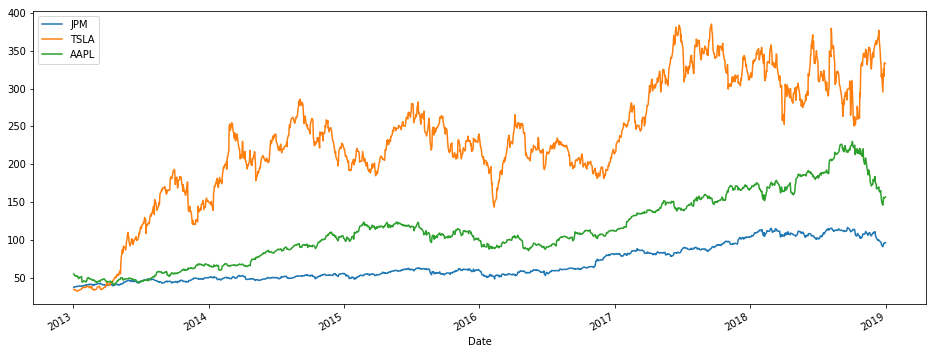

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

JPM['Adj Close'].plot(label='JPM',figsize=(16,6))
TSLA['Adj Close'].plot(label='TSLA')
AAPL['Adj Close'].plot(label='AAPL')


plt.legend();

In [3]:
#Use Date as index
JPM.reset_index(inplace=True,drop=False)
JPM.set_index('Date',inplace=True,drop=False)

#Extract only the EOM prices
JPM_EOM= JPM.groupby(pd.Grouper(key='Date',freq='MS')).apply(lambda x: x[-1:])
JPM_EOM.reset_index(inplace=True,drop=True)
JPM_EOM.set_index('Date',inplace=True,drop=True)
JPM_EOM;

In [4]:
#Use Date as index
AAPL.reset_index(inplace=True,drop=False)
AAPL.set_index('Date',inplace=True,drop=False)

#Extract only the EOM prices
AAPL_EOM= AAPL.groupby(pd.Grouper(key='Date',freq='MS')).apply(lambda x: x[-1:])
AAPL_EOM.reset_index(inplace=True,drop=True)
AAPL_EOM.set_index('Date',inplace=True,drop=True)
AAPL_EOM;

In [5]:
#Use Date as index
TSLA.reset_index(inplace=True,drop=False)
TSLA.set_index('Date',inplace=True,drop=False)

#Extract only the EOM prices
TSLA_EOM= TSLA.groupby(pd.Grouper(key='Date',freq='MS')).apply(lambda x: x[-1:])
TSLA_EOM.reset_index(inplace=True,drop=True)
TSLA_EOM.set_index('Date',inplace=True,drop=True)
TSLA_EOM;

In [6]:
for stock in (JPM_EOM,AAPL_EOM,TSLA_EOM):
    stock['Cumulative Return'] = stock['Adj Close']/stock.iloc[0]['Adj Close']

In [7]:
JPM_EOM

,High,Low,Open,Close,Volume,Adj Close,Cumulative Return
Date,,,,,,,
2013-01-31,47.220001,46.880001,47.009998,47.049999,19536000.0,40.006535,1.000000
2013-02-28,49.549999,48.750000,49.160000,48.919998,24711500.0,41.596584,1.039745
2013-03-28,47.930000,47.279999,47.840000,47.459999,27506700.0,40.355156,1.008714
2013-04-30,49.250000,48.720001,48.959999,49.009998,13802600.0,41.933689,1.048171
2013-05-31,55.830002,54.590000,55.709999,54.590000,24990100.0,46.708023,1.167510
2013-06-28,53.130001,52.580002,53.119999,52.790001,18256000.0,45.167904,1.129013
2013-07-31,56.270000,55.509998,55.580002,55.730000,19404900.0,48.031136,1.200582
2013-08-30,50.830002,50.290001,50.820000,50.529999,15863100.0,43.549484,1.088559
2013-09-30,52.090000,51.439999,51.730000,51.689999,21350600.0,44.549248,1.113549


In [8]:
for stock,weights in zip([JPM_EOM,AAPL_EOM,TSLA_EOM],[0.333,0.333,0.333]):
    stock['Portfolio'] = stock['Cumulative Return']*weights
print(TSLA_EOM);

                  High         Low        Open       Close    Volume  \
Date                                                                   
2013-01-31   37.869999   36.930000   37.869999   37.509998    901400   
2013-02-28   36.099998   34.369999   35.889999   34.830002   1964900   
2013-03-28   38.240002   37.750000   38.230000   37.889999   1158700   
2013-04-30   58.180000   53.759998   56.000000   53.990002   5522600   
2013-05-31  106.440002   97.730003  106.260002   97.760002  15172000   
2013-06-28  109.440002  106.709999  108.570000  107.360001   5748600   
2013-07-31  134.970001  131.449997  132.570007  134.279999   6351700   
2013-08-30  169.210007  163.960007  166.369995  169.000000  11028400   
2013-09-30  194.500000  188.000000  189.000000  193.369995   8924700   
2013-10-31  162.440002  153.300003  155.669998  159.940002   9333800   
2013-11-29  130.589996  126.980003  129.770004  127.279999   9716200   
2013-12-31  153.199997  148.660004  152.320007  150.429993   426

In [9]:
#Create a common dataframe
folio = pd.concat([JPM_EOM['Portfolio'],AAPL_EOM['Portfolio'],TSLA_EOM['Portfolio']],axis=1)
folio.columns = ['JPM','AAPL','TSLA']
folio['Total'] = folio.sum(axis=1)

print(folio);

                 JPM      AAPL      TSLA     Total
Date                                              
2013-01-31  0.333000  0.333000  0.333000  0.999000
2013-02-28  0.346235  0.336341  0.309208  0.991784
2013-03-28  0.335902  0.337301  0.336374  1.009576
2013-04-30  0.349041  0.337392  0.479303  1.165737
2013-05-31  0.388781  0.359223  0.867877  1.615881
2013-06-28  0.375961  0.316729  0.953103  1.645793
2013-07-31  0.399794  0.361459  1.192089  1.953342
2013-08-30  0.362490  0.407897  1.500320  2.270707
2013-09-30  0.370812  0.399132  1.716668  2.486611
2013-10-31  0.372460  0.437601  1.419889  2.229949
2013-11-29  0.413507  0.485255  1.129945  2.028707
2013-12-31  0.422612  0.489574  1.335462  2.247649
2014-01-31  0.402682  0.436849  1.610491  2.450022
2014-02-28  0.413302  0.479182  2.173333  3.065817
2014-03-31  0.441597  0.488743  1.850543  2.780883
2014-04-30  0.409758  0.537322  1.845571  2.792652
2014-05-30  0.406757  0.599712  1.844506  2.850975
2014-06-30  0.421763  0.616301 

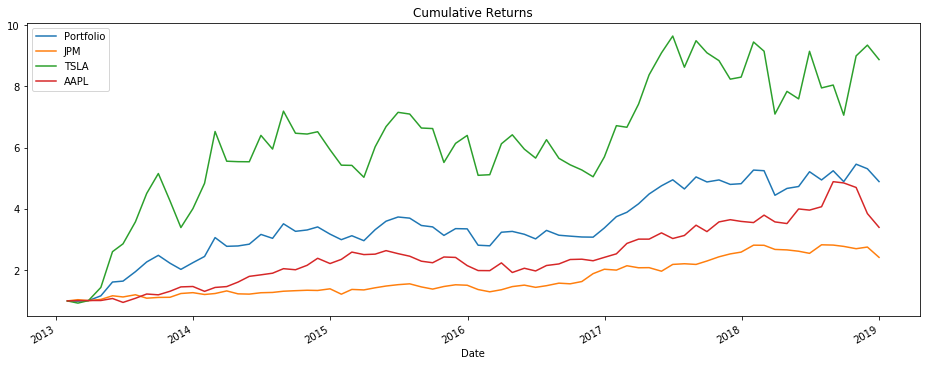

In [10]:
folio['Total'].plot(label='Portfolio', figsize=(10,8))

JPM_EOM['Cumulative Return'].plot(label='JPM',figsize=(16,6))
TSLA_EOM['Cumulative Return'].plot(label='TSLA')
AAPL_EOM['Cumulative Return'].plot(label='AAPL')

plt.title('Cumulative Returns')
plt.legend();

In [11]:
#Compute Sharpe Ratio (annualized)

folio['Monthly Return'] = folio['Total'].pct_change(1)

SR= (12 **0.5) * folio['Monthly Return'].mean()/folio['Monthly Return'].std() 

print(SR);

0.9986338901618488


In [12]:
for stock,weights in zip([JPM_EOM,AAPL_EOM,TSLA_EOM],[0.2,0.2,0.6]):
    stock['Portfolio1'] = stock['Cumulative Return']*weights
TSLA_EOM

,High,Low,Open,Close,Volume,Adj Close,Cumulative Return,Portfolio,Portfolio1
Date,,,,,,,,,
2013-01-31,37.869999,36.930000,37.869999,37.509998,901400,37.509998,1.000000,0.333000,0.600000
2013-02-28,36.099998,34.369999,35.889999,34.830002,1964900,34.830002,0.928552,0.309208,0.557131
2013-03-28,38.240002,37.750000,38.230000,37.889999,1158700,37.889999,1.010131,0.336374,0.606078
2013-04-30,58.180000,53.759998,56.000000,53.990002,5522600,53.990002,1.439350,0.479303,0.863610
2013-05-31,106.440002,97.730003,106.260002,97.760002,15172000,97.760002,2.606239,0.867877,1.563743
2013-06-28,109.440002,106.709999,108.570000,107.360001,5748600,107.360001,2.862170,0.953103,1.717302
2013-07-31,134.970001,131.449997,132.570007,134.279999,6351700,134.279999,3.579846,1.192089,2.147907
2013-08-30,169.210007,163.960007,166.369995,169.000000,11028400,169.000000,4.505465,1.500320,2.703279
2013-09-30,194.500000,188.000000,189.000000,193.369995,8924700,193.369995,5.155159,1.716668,3.093095


In [13]:
#Create a common dataframe
folio1 = pd.concat([JPM_EOM['Portfolio1'],AAPL_EOM['Portfolio1'],TSLA_EOM['Portfolio1']],axis=1)
folio1.columns = ['JPM','AAPL','TSLA']
folio1['Total'] = folio1.sum(axis=1)

print(folio1);

                 JPM      AAPL      TSLA     Total
Date                                              
2013-01-31  0.200000  0.200000  0.600000  1.000000
2013-02-28  0.207949  0.202007  0.557131  0.967087
2013-03-28  0.201743  0.202583  0.606078  1.010404
2013-04-30  0.209634  0.202638  0.863610  1.275882
2013-05-31  0.233502  0.215749  1.563743  2.012995
2013-06-28  0.225803  0.190228  1.717302  2.133333
2013-07-31  0.240116  0.217093  2.147907  2.605116
2013-08-30  0.217712  0.244983  2.703279  3.165974
2013-09-30  0.222710  0.239719  3.093095  3.555524
2013-10-31  0.223700  0.262823  2.558358  3.044881
2013-11-29  0.248353  0.291444  2.035937  2.575734
2013-12-31  0.253821  0.294039  2.406238  2.954098
2014-01-31  0.241851  0.262372  2.901786  3.406009
2014-02-28  0.248229  0.287797  3.915916  4.451942
2014-03-31  0.265224  0.293539  3.334311  3.893074
2014-04-30  0.246101  0.322716  3.325353  3.894171
2014-05-30  0.244299  0.360188  3.323434  3.927920
2014-06-30  0.253311  0.370151 

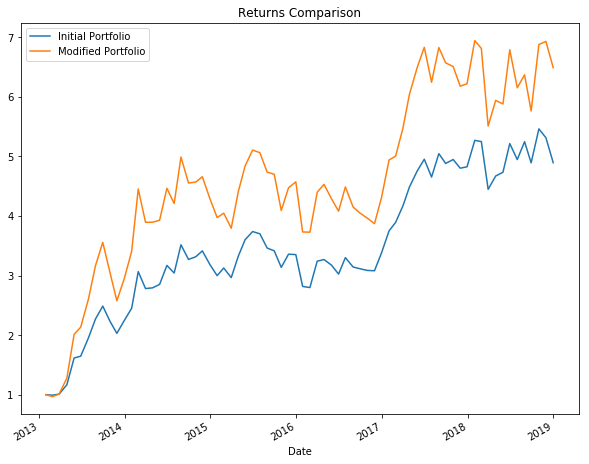

In [14]:
#Plot the cum. returns of the 2 portfolios

folio['Total'].plot(label='Initial Portfolio', figsize=(10,8))
folio1['Total'].plot(label='Modified Portfolio')

plt.title('Returns Comparison')
plt.legend();

In [15]:
#Sharpe Ratio for the second portfolio
folio1['Monthly Return'] = folio1['Total'].pct_change(1)

SR = (12 **0.5) * folio1['Monthly Return'].mean()/folio1['Monthly Return'].std() 

In [16]:
print(SR)

0.9306498381034373


In [17]:
###############   Markowitz Frontier   ###############

In [18]:
#Create a data frame for monthly returns
stocks_returns = pd.concat([JPM_EOM['Adj Close'],AAPL_EOM['Adj Close'],TSLA_EOM['Adj Close']],axis=1).pct_change(1)
stocks_returns.columns = ['JPM',' AAPL','TSLA']

stocks_returns.dropna(inplace=True)

In [19]:
#Compute monthly returns
print(stocks_returns);

                 JPM      AAPL      TSLA
Date                                    
2013-02-28  0.039745  0.010033 -0.071448
2013-03-28 -0.029844  0.002855  0.087855
2013-04-30  0.039116  0.000271  0.424914
2013-05-31  0.113854  0.064703  0.810706
2013-06-28 -0.032973 -0.118293  0.098200
2013-07-31  0.063391  0.141225  0.250745
2013-08-30 -0.093307  0.128473  0.258564
2013-09-30  0.022957 -0.021489  0.144201
2013-10-31  0.004444  0.096381 -0.172881
2013-11-29  0.110206  0.108898 -0.204202
2013-12-31  0.022020  0.008902  0.181882
2014-01-31 -0.047160 -0.107697  0.205943
2014-02-28  0.026373  0.096906  0.349485
2014-03-31  0.068462  0.019953 -0.148523
2014-04-30 -0.072100  0.099397 -0.002686
2014-05-30 -0.007324  0.116113 -0.000577
2014-06-30  0.036890  0.027662  0.155412
2014-07-31  0.007864  0.028731 -0.069816
2014-08-29  0.030865  0.077509  0.207792
2014-09-30  0.013289 -0.017073 -0.100185
2014-10-31  0.010748  0.071960 -0.004038
2014-11-28 -0.005291  0.105979  0.011667
2014-12-31  0.04

In [20]:
#Compute the Covariance Matrix
stocks_returns.cov() * 12

,JPM,AAPL,TSLA
JPM,0.038810,0.007628,0.013775
AAPL,0.007628,0.068737,0.014520
TSLA,0.013775,0.014520,0.316693


In [21]:
#Generate random simulation for weights

import numpy as np

#define number of trials

iterations = 20000

#store generated weights

store_weights = np.zeros((iterations,3))
store_returns = np.zeros(iterations)
store_vol = np.zeros(iterations)
store_sharpe = np.zeros(iterations)

for ind in range(iterations):

    # generate random numbers
    weights = np.array(np.random.random(3))

    # normalize weights
    weights = weights / np.sum(weights)
    
    # save weights
    store_weights[ind,:] = weights

    # compute return
    store_returns[ind] = np.sum((stocks_returns.mean() * weights) *12)

    # compute variance
    store_vol[ind] = np.sqrt(np.dot(weights.T, np.dot(stocks_returns.cov() * 12, weights)))

    # compute sharpe ratio
    store_sharpe[ind] = store_returns[ind]/store_vol[ind]

In [22]:
#Maximum Sharpe Ratio
store_sharpe.max()

1.3918682416304893

In [23]:
#weights which yielded the max Sharpe Ratio
store_weights[store_sharpe.argmax(),:]

array([0.4383934 , 0.38458263, 0.17702397])

In [24]:
#store return and vol for maximum Sharpe Ratio
sharpe_ret = store_returns[store_sharpe.argmax()]
sharpe_vol = store_vol[store_sharpe.argmax()]
print(sharpe_ret)
print(sharpe_vol)

0.25753962310850603
0.18503161104302085


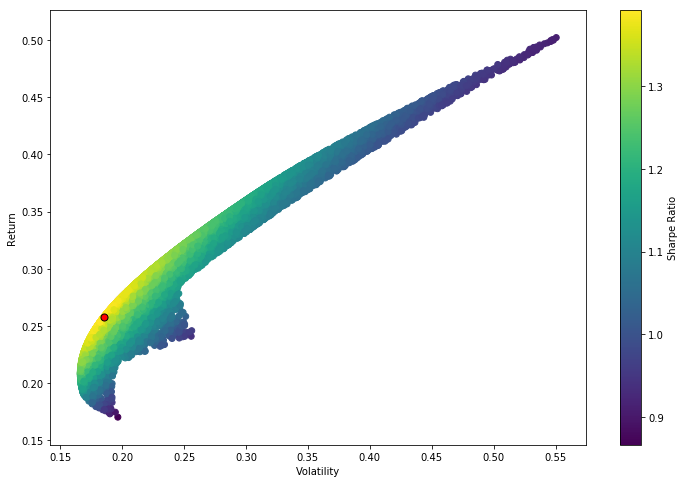

In [25]:
#plotting all simulations

plt.figure(figsize=(12,8))
plt.scatter(store_vol,store_returns,c=store_sharpe,cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add  dot for max SR
plt.scatter(sharpe_vol,sharpe_ret,c='red',s=50,edgecolors='black')

In [26]:
######  Solve the Maximum Sharpe Ratio portfolio ######

In [27]:
from scipy.optimize import minimize

In [28]:
help(minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    Parameters
    ----------
    fun : callable
        The objective function to be minimized.
    
            ``fun(x, *args) -> float``
    
        where x is an 1-D array with shape (n,) and `args`
        is a tuple of the fixed parameters needed to completely
        specify the function.
    x0 : ndarray, shape (n,)
        Initial guess. Array of real elements of size (n,),
        where 'n' is the number of independent variables.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (`fun`, `jac` and `hess` functions).
    method : str or callable, optional
        Type of solver.  Should be one of
    
            - 'Nelder-Mead' :ref:`(see here) <op

In [29]:
#Create function to be minimized

def compute_sharpe_ratio(weights):
    
    weights = np.array(weights)
    returns = np.sum((stocks_returns.mean() * weights) *12)
    vol = np.sqrt(np.dot(weights.T, np.dot(stocks_returns.cov() * 12, weights)))
    sharpe_ratio = returns/vol
    return np.array([returns,vol,sharpe_ratio])

def neg_sharpe(weights):
    return  compute_sharpe_ratio(weights)[2] * -1

In [30]:
# #adding constraints
def sum_weights(weights):
    return np.sum(weights) - 1

cons = ({'type':'eq','fun': sum_weights})


In [31]:
# bounding weights between 0 and 1
bounds = ((0, 1), (0, 1), (0, 1))

In [32]:
# Initial Guess 
init_guess = [0.33,0.33,0.33]

In [33]:
# use as method = Sequential Least SQuares Programming (SLSQP).
optimize = minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)

In [34]:
optimize

     fun: -1.3918828571775521
     jac: array([ 0.00018829,  0.00062922, -0.00183435])
 message: 'Optimization terminated successfully.'
    nfev: 27
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([0.44153287, 0.38209682, 0.17637031])

In [35]:
compute_sharpe_ratio(optimize.x)

array([0.25713602, 0.1847397 , 1.39188286])